In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from matplotlib import rcParams
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# load json data
df = pd.read_json('C:/Users/Taha/Downloads/Springboard-master/ultimate_challenge/logins.json')

# take a look at the data
df.head()


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
df.login_time.min()

Timestamp('1970-01-01 20:12:16')

In [5]:
df.login_time.max()

Timestamp('1970-04-13 18:57:38')

In [6]:
# get login counts on a 15-minute time interval

# need datetime index to resample
df = df.set_index(['login_time'])

In [7]:
# add 'count' column
df['count'] = 0
df = df.resample('15T').count()
df = df.reset_index()
df.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9788 entries, 0 to 9787
Data columns (total 2 columns):
login_time    9788 non-null datetime64[ns]
count         9788 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 153.0 KB


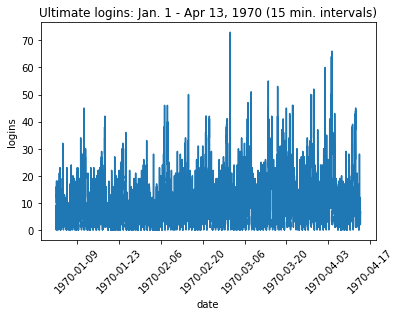

In [9]:
# histogram
plt.plot(df['login_time'], df['count'])
plt.xticks(rotation = 45)
plt.xlabel('date')
plt.ylabel('logins')
plt.title('Ultimate logins: Jan. 1 - Apr 13, 1970 (15 min. intervals)');

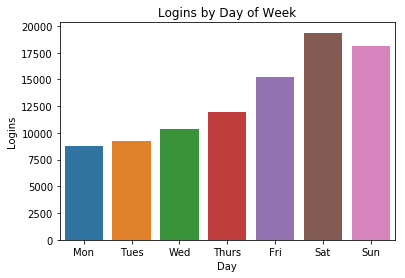

In [10]:
# break logins into days of week
df['day_of_week'] = df.login_time.dt.dayofweek

# sort by count
df_wkd = df.sort_values(by = 'count', ascending = False)

# extract the day of week and count, then group by day and sum all logins
df_wkd = df_wkd[['day_of_week', 'count']]
df_wkd = df_wkd.groupby('day_of_week').sum().reset_index()

# names for ease of reference
df_wkd.day_of_week = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

# bar plot
sns.barplot(x = 'day_of_week', y = 'count', data = df_wkd)
plt.xlabel('Day')
plt.ylabel('Logins')
plt.title('Logins by Day of Week');

# EDA

In [11]:
df['hour'] = df.login_time.dt.hour
hours = df[['hour', 'count']]
hours = hours.groupby('hour').sum().reset_index()

# Monday
mon = df[df.day_of_week == 0]

# create a new df to highlight logins by hour, weekends only
mon_hours = mon[['hour', 'count']]
mon_hours = mon_hours.groupby('hour').sum().reset_index()
mon_hours.head()

,hour,count
0,0,531
1,1,414
2,2,312
3,3,236
4,4,206


In [12]:
# Tues
tues = df[df.day_of_week == 1]

# create a new df to highlight logins by hour, weekends only
tues_hours = tues[['hour', 'count']]
tues_hours = tues_hours.groupby('hour').sum().reset_index()

In [13]:
# Wed
wed = df[df.day_of_week == 2]

# create a new df to highlight logins by hour, weekends only
wed_hours = wed[['hour', 'count']]
wed_hours = wed_hours.groupby('hour').sum().reset_index()

In [14]:
# Thurs
thurs = df[df.day_of_week == 3]

# create a new df to highlight logins by hour, weekends only
thurs_hours = thurs[['hour', 'count']]
thurs_hours = thurs_hours.groupby('hour').sum().reset_index()

In [15]:
# Fri
fri = df[df.day_of_week == 4]

# create a new df to highlight logins by hour, weekends only
fri_hours = fri[['hour', 'count']]
fri_hours = fri_hours.groupby('hour').sum().reset_index()

In [16]:
# Sat
sat = df[df.day_of_week == 5]

# create a new df to highlight logins by hour, weekends only
sat_hours = sat[['hour', 'count']]
sat_hours = sat_hours.groupby('hour').sum().reset_index()

In [17]:
# Sun
sun = df[df.day_of_week == 6]

# create a new df to highlight logins by hour, weekends only
sun_hours = sun[['hour', 'count']]
sun_hours = sun_hours.groupby('hour').sum().reset_index()

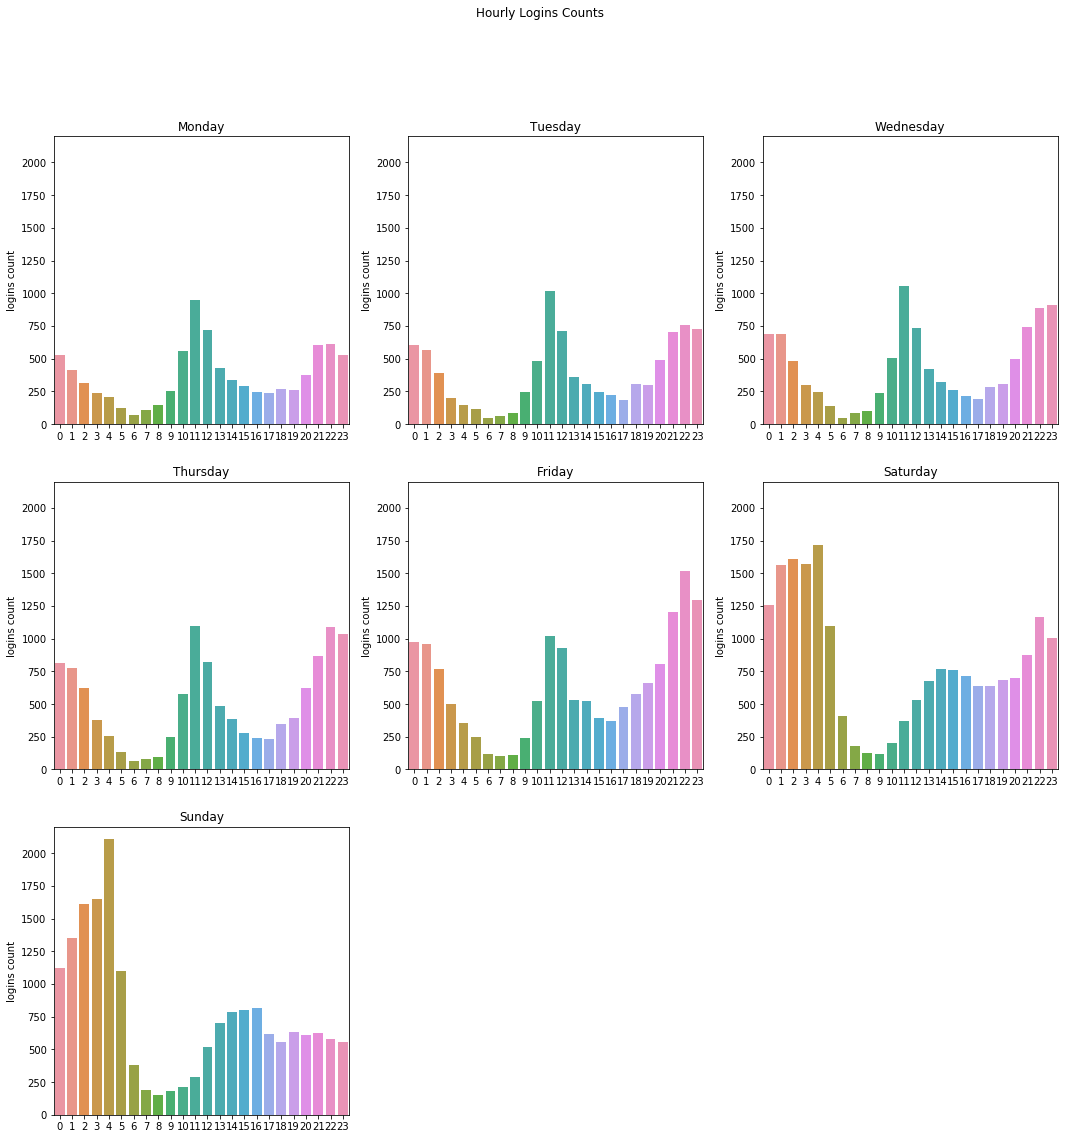

In [18]:
fig = plt.figure(figsize = (18,18))

ax = fig.add_subplot(3,3,1)
sns.barplot(x = 'hour', y = 'count', data = mon_hours)
plt.xlabel('')
plt.ylabel('logins count')
plt.ylim(ymax = 2200)
plt.title('Monday')

ax = fig.add_subplot(3,3,2)
sns.barplot(x = 'hour', y = 'count', data = tues_hours)
plt.xlabel('')
plt.ylabel('logins count')
plt.ylim(ymax = 2200)
plt.title('Tuesday')

ax = fig.add_subplot(3,3,3)
sns.barplot(x = 'hour', y = 'count', data = wed_hours)
plt.xlabel('')
plt.ylabel('logins count')
plt.ylim(ymax = 2200)
plt.title('Wednesday')

ax = fig.add_subplot(3,3,4)
sns.barplot(x = 'hour', y = 'count', data = thurs_hours)
plt.xlabel('')
plt.ylabel('logins count')
plt.ylim(ymax = 2200)
plt.title('Thursday')

ax = fig.add_subplot(3,3,5)
sns.barplot(x = 'hour', y = 'count', data = fri_hours)
plt.xlabel('')
plt.ylabel('logins count')
plt.ylim(ymax = 2200)
plt.title('Friday')

ax = fig.add_subplot(3,3,6)
sns.barplot(x = 'hour', y = 'count', data = sat_hours)
plt.xlabel('')
plt.ylabel('logins count')
plt.ylim(ymax = 2200)
plt.title('Saturday')

ax = fig.add_subplot(3,3,7)
sns.barplot(x = 'hour', y = 'count', data = sun_hours)
plt.xlabel('')
plt.ylabel('logins count')
plt.ylim(ymax = 2200)
plt.title('Sunday')

plt.suptitle('Hourly Logins Counts');

# Part    2    ‑    Experiment    and    metrics    design  

The    neighboring     cities    of    Gotham    and    Metropolis    have     complementary     circadian     rhythms: on
weekdays,    Ultimate    Gotham     is    most     active    at    night,    and    Ultimate    Metropolis     is    most
active  during     the    day.    On    weekends,     there     is     reasonable    activity     in    both     cities. 


However,    a     toll    bridge,     with     a     two  ­way     toll,    between     the     two     cities     causes 
driver    partners     to     tend  to    be    exclusive     to    each     city.     The     Ultimate    managers    of 
city    operations     for     the     two     cities    have  proposed    an    experiment     to     encourage    driver 
partners     to    be    available     in    both     cities,    by  reimbursing    all     toll     costs. 

1. What    would     you     choose     as     the     key    measure    of     success    of     this    experiment     in  encouraging    driver     partners     to     serve    both     cities,    and    why    would     you     choose     this    metric?  
2. Describe    a    practical     experiment     you    would    design     to     compare     the    effectiveness    of     the  proposed     change     in     relation     to     the     key    measure    of     success.    Please    provide    details     on:   
    a. how     you    will     implement     the    experiment  
    b. what     statistical     test(s)     you    will     conduct     to     verify     the     significance    of                  the observation  
    c. how     you    would     interpret     the     results    and    provide     recommendations     to     the     city           operations     team    along    with    any     caveats. 




Answers: 
1. The only reason for reimbursing tolls would be to increase driver availability levels to reduce wait times for users. The 
intended consequence is that more users would take more trips more often and that the income to the company would exceed the 
costs of reimbursing the tolls. 
2. 

a. The key measure of success would be Ultimate's income after subtracting out the cost of paying for the tolls. Other indicators would be the number of drivers available for pickups at all times, the number of trips across the toll bridge, and the mean time between a user requesting a car and pickup.

b. I would recommend performing an A/B test wherein a portion of the drivers are offered reimbursement and the remaining drivers continue to operate without being reimbursed for tolls. This will allow us to control for factors such as a general growth in popularity of our service as well as seasonal changes in ridership while testing. I would perform a 
t−test with a confidence level of 95%, where the null hypothesis is the reimbursing drivers for tolls does not have a statistically-significant impact on Ultimate's net profits. 

c. I would also suggest that this test may not be entirely dispositive. The danger is that once toll reimbursements are extended to all drivers, the pool of available drivers may become saturated and cause some drivers to stop driving, again increasing wait times and causing users to use a different service. 


# Part    3    ‑    Predictive     modeling

In [19]:
import json

file = open('C:/Users/Taha/Downloads/Springboard-master/ultimate_challenge/ultimate_data_challenge.json', 'r')
df = pd.DataFrame(json.load(file))
file.close()

df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


 ## Fill Missing Data
Missing ratings: people that don't rate probably didn't have strong feelings one way or the other, so fill missing values with averages 

Missing phones: fill with the most popular value 


In [21]:
# rating by driver
df.avg_rating_by_driver = df.avg_rating_by_driver.fillna(df.avg_rating_by_driver).mean()
df.avg_rating_of_driver = df.avg_rating_of_driver.fillna(df.avg_rating_of_driver).mean()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [22]:
# fill missing phone
df.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [23]:
df.phone = df.phone.fillna('iPhone')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [24]:
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [25]:
earliest_signup = df.signup_date.min()
latest_signup = df.signup_date.max()
signups_ct = df.signup_date.count()
last_trip = df.last_trip_date.max()

print('There were {} signups between {} and {}'.format(signups_ct, earliest_signup, latest_signup))
print('Last trip: {}'.format(last_trip))

There were 50000 signups between 2014-01-01 00:00:00 and 2014-01-31 00:00:00
Last trip: 2014-07-01 00:00:00


In [26]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158e+00,4.601559e+00,1.074764,8.849536,2.278200,60.926084
std,5.707357,3.250766e-12,8.473307e-13,0.222336,19.958811,3.792684,37.081503
min,0.000000,4.778158e+00,4.601559e+00,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.778158e+00,4.601559e+00,1.000000,0.000000,0.000000,33.300000
50%,3.880000,4.778158e+00,4.601559e+00,1.000000,0.000000,1.000000,66.700000
75%,6.940000,4.778158e+00,4.601559e+00,1.050000,8.600000,3.000000,100.000000
max,160.960000,4.778158e+00,4.601559e+00,8.000000,100.000000,125.000000,100.000000


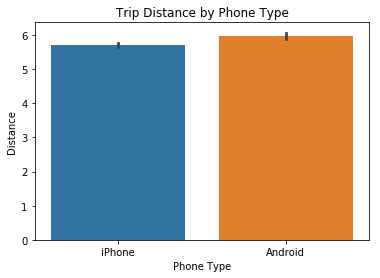

In [27]:
# dist by phone
sns.barplot(x='phone', y='avg_dist', data=df)
plt.ylabel('Distance')
plt.xlabel('Phone Type')
plt.title('Trip Distance by Phone Type');

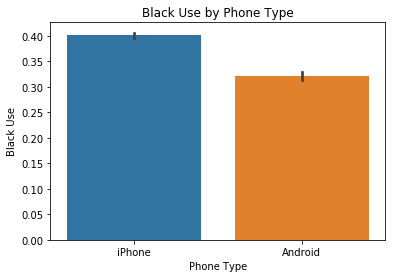

In [28]:
# black by phone
sns.barplot(x='phone', y='ultimate_black_user', data=df)
plt.ylabel('Black Use')
plt.xlabel('Phone Type')
plt.title('Black Use by Phone Type');

In [29]:
active = df[df.last_trip_date >= '2014-06-01 00:00:00']
active.head()
len(active)


18804

In [30]:
print('Cities: {}'.format(df.city.unique()))


Cities: ["King's Landing" 'Astapor' 'Winterfell']


In [31]:
# mark users 'retained' in main df if rode in last 30 days
df['retained'] =  df.last_trip_date >= '2014-06-01 00:00:00'
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,4.778158,4.601559,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,True
1,8.26,4.778158,4.601559,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,False
2,0.77,4.778158,4.601559,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,False
3,2.36,4.778158,4.601559,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,True
4,3.13,4.778158,4.601559,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,False


## EDA - Retention by:
### Phone Type

In [32]:
ph_ret = df[['retained', 'phone']].groupby('phone').sum().reset_index()
ph_ret








,phone,retained
0,Android,3146.0
1,iPhone,15658.0


In [33]:
all_android = df[df.phone == 'Android'].phone.count()
all_android

15022

In [34]:
all_iphone = df[df.phone == 'iPhone'].phone.count()
all_iphone


34978

In [35]:
ph_ret['percent'] = 0

In [36]:
ph_ret.iloc[0, 2] = ph_ret.loc[0, 'retained'] / all_android * 100
ph_ret.iloc[1, 2] = ph_ret.loc[1, 'retained'] / all_iphone * 100

ph_ret

,phone,retained,percent
0,Android,3146.0,20.942617
1,iPhone,15658.0,44.765281


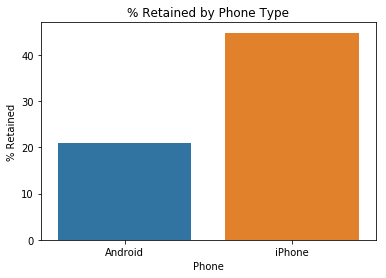

In [37]:
sns.barplot(x = 'phone', y = 'percent', data = ph_ret)
plt.xlabel('Phone')
plt.ylabel('% Retained')
plt.title('% Retained by Phone Type');

### City

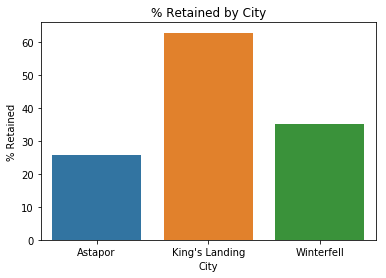

In [38]:
city = df[['retained', 'city']].groupby('city').sum().reset_index()

city_total = df[['retained', 'city']].groupby('city').count().reset_index()

city = city.merge(city_total, on = 'city')
city.columns = ['city', 'retained', 'total']
city['percent'] = city.retained / city.total * 100
city

sns.barplot(x = 'city', y = 'percent', data = city)
plt.xlabel('City')
plt.ylabel('% Retained')
plt.title('% Retained by City');

### Early Use

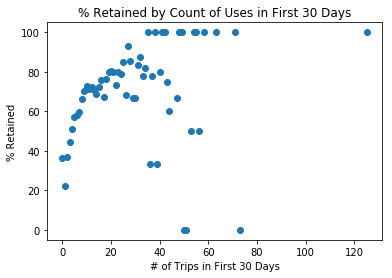

In [39]:
early = df[['retained', 'trips_in_first_30_days']].groupby('trips_in_first_30_days').sum().reset_index()

early_total = df[['retained', 'trips_in_first_30_days']].groupby('trips_in_first_30_days').count().reset_index()

early = early.merge(early_total, on = 'trips_in_first_30_days')
early
early.columns = ['trips_in_first_30_days', 'retained', 'total']
early['percent'] = early.retained / early.total * 100
early

plt.scatter(early['trips_in_first_30_days'], early['percent'])
plt.xlabel('# of Trips in First 30 Days')
plt.ylabel('% Retained')
plt.title('% Retained by Count of Uses in First 30 Days');

In [40]:
df = df.drop(['last_trip_date', 'signup_date'], axis = 1)

In [41]:
df = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'])
df.head()


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,3.67,4.778158,4.601559,1.10,15.4,4,46.2,True,0,1,0,0,1,0,1
1,8.26,4.778158,4.601559,1.00,0.0,0,50.0,False,1,0,0,1,0,1,0
2,0.77,4.778158,4.601559,1.00,0.0,3,100.0,False,1,0,0,0,1,1,0
3,2.36,4.778158,4.601559,1.14,20.0,9,80.0,True,0,1,0,0,1,0,1
4,3.13,4.778158,4.601559,1.19,11.8,14,82.4,False,0,0,1,1,0,1,0


In [42]:
y = df.retained
df = df.drop('retained', axis = 1)
df = df.join(y)
df.head()


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True,retained
0,3.67,4.778158,4.601559,1.10,15.4,4,46.2,0,1,0,0,1,0,1,True
1,8.26,4.778158,4.601559,1.00,0.0,0,50.0,1,0,0,1,0,1,0,False
2,0.77,4.778158,4.601559,1.00,0.0,3,100.0,1,0,0,0,1,1,0,False
3,2.36,4.778158,4.601559,1.14,20.0,9,80.0,0,1,0,0,1,0,1,True
4,3.13,4.778158,4.601559,1.19,11.8,14,82.4,0,0,1,1,0,1,0,False


In [43]:
from sklearn import preprocessing

# create scaler
scaler = preprocessing.StandardScaler()

# select columns to scale
cols = df.columns.tolist()
cols_to_scale = cols[:7]
cols_to_scale

# transform numeric stats
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True,retained
0,-0.372650,-1.0,-1.0,0.113506,0.328202,0.453984,-0.397131,0,1,0,0,1,0,1,True
1,0.431583,-1.0,-1.0,-0.336268,-0.443394,-0.600689,-0.294653,1,0,0,1,0,1,0,False
2,-0.880771,-1.0,-1.0,-0.336268,-0.443394,0.190316,1.053741,1,0,0,0,1,1,0,False
3,-0.602181,-1.0,-1.0,0.293416,0.558679,1.772325,0.514383,0,1,0,0,1,0,1,True
4,-0.467266,-1.0,-1.0,0.518303,0.147829,3.090665,0.579106,0,0,1,1,0,1,0,False


In [44]:
df.to_csv('C:/Users/Taha/Downloads/Springboard-master/ultimate_challenge/to_model.csv')

In [45]:
# sklearn imports
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

data = 'C:/Users/Taha/Downloads/Springboard-master/ultimate_challenge/to_model.csv'

# set random_state SEED variable
SEED = 42

In [46]:
# import data and split into features matrix and target vector
df = pd.read_csv(data, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# training set breakdown
train_success = y_train.sum()
train_total = len(y_train)
train_percent = train_success / train_total
print('Training Set\nSuccesses:\t{}\nTotal:\t\t{}\nPercent:\t{:.3f}\n'.format(train_success, train_total, train_percent))

# test set breakdown
test_success = y_test.sum()
test_total = len(y_test)
test_percent = test_success / test_total
print('Test Set\nSuccesses:\t{}\nTotal:\t\t{}\nPercent:\t{:.3f}\n\n'.format(test_success, test_total, test_percent))

Training Set
Successes:	13183
Total:		35000
Percent:	0.377

Test Set
Successes:	5621
Total:		15000
Percent:	0.375




Class 0: 31196
Class 1: 18804
Proportion: 2.0 : 1


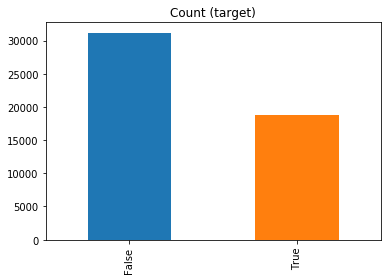

In [47]:
# check for balanced data set

target_count = df.retained.value_counts()
print('Class 0: {}'.format(target_count[0]))
print('Class 1: {}'.format(target_count[1]))
print('Proportion: {}'.format(round(target_count[0] / target_count[1]), 2), ': 1')

target_count.plot(kind='bar', title = 'Count (target)');

## Logistic Regression

Logistic Regression Accuracy:	0.7143

              precision    recall  f1-score   support

       False       0.74      0.84      0.79      9379
        True       0.66      0.50      0.57      5621

   micro avg       0.71      0.71      0.71     15000
   macro avg       0.70      0.67      0.68     15000
weighted avg       0.71      0.71      0.70     15000



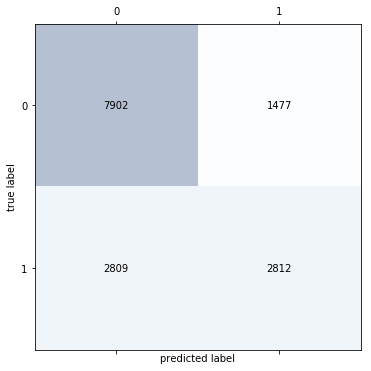

In [48]:
# imports
from sklearn.linear_model import LogisticRegression

# import data and split into features matrix and target vector
df = pd.read_csv(data, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# instantiate & fit model
model = LogisticRegression(random_state = SEED)
model.fit(X_train, y_train)

# make predictions on test features
y_pred = model.predict(X_test)

# score predictions
accuracy = model.score(X_test, y_test)
print('Logistic Regression Accuracy:\t{:.4f}\n'.format(accuracy))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

## Logistic Regression - Tuning

Best penalty: l2
Best C: 0.01
Tuned Accuracy:	0.7146

              precision    recall  f1-score   support

       False       0.74      0.85      0.79      9379
        True       0.66      0.49      0.56      5621

   micro avg       0.71      0.71      0.71     15000
   macro avg       0.70      0.67      0.68     15000
weighted avg       0.71      0.71      0.70     15000



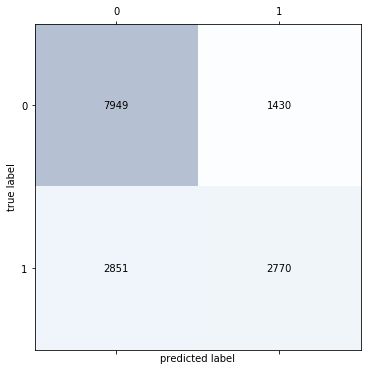

In [49]:
# import data and split into features matrix and target vector
df = pd.read_csv(data, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# instantiate the learning algorithm
model = LogisticRegression(random_state = SEED)

# create a params dict
penalty = ['l1', 'l2']
C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
hyperparameters = dict(C = C, penalty = penalty)

# instantiate & fit grid search
gridsearch = GridSearchCV(model, hyperparameters, cv = 5, verbose = 0)
best_model = gridsearch.fit(X_train, y_train)

# print the best hyperparameters
best_penalty = best_model.best_estimator_.get_params()['penalty']
best_C = best_model.best_estimator_.get_params()['C']
print('Best penalty: {}'.format(best_penalty))
print('Best C: {}'.format(best_C))

# build & fit a tuned model
tuned_model = LogisticRegression(C = best_C, penalty = best_penalty)
tuned_model.fit(X_train, y_train)

# make predictions on test features
y_pred = tuned_model.predict(X_test)

# score predictions
accuracy = tuned_model.score(X_test, y_test)
print('Tuned Accuracy:\t{:.4f}\n'.format(accuracy))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

## LinearSVC

Accuracy: 0.7129
              precision    recall  f1-score   support

       False       0.73      0.85      0.79      9379
        True       0.66      0.48      0.56      5621

   micro avg       0.71      0.71      0.71     15000
   macro avg       0.70      0.67      0.67     15000
weighted avg       0.71      0.71      0.70     15000



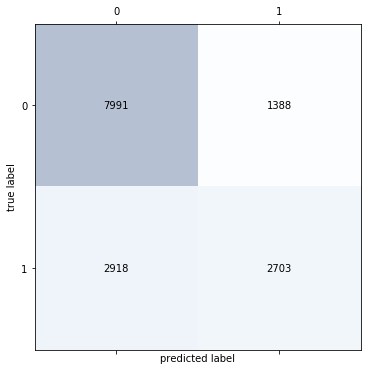

In [50]:
#imports
from sklearn.svm import LinearSVC

# import data and split into features matrix and target vector
df = pd.read_csv(data, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# instantiate and fit the learning algorithm
model = LinearSVC(random_state=SEED)
model.fit(X_train, y_train)

# make predictions on test features
y_pred = model.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

## LinearSVC - Tuning

Best C: 0.001
Tuned Accuracy:	0.7147

              precision    recall  f1-score   support

       False       0.73      0.86      0.79      9379
        True       0.67      0.47      0.55      5621

   micro avg       0.71      0.71      0.71     15000
   macro avg       0.70      0.67      0.67     15000
weighted avg       0.71      0.71      0.70     15000



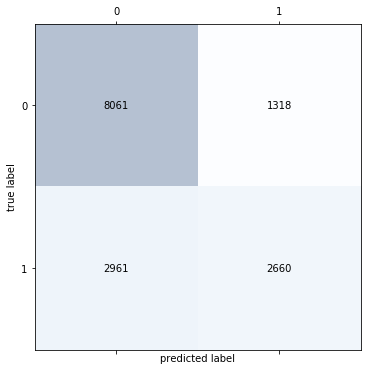

In [51]:
# import data and split into features matrix and target vector
df = pd.read_csv(data, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# instantiate and fit the learning algorithm
model = LinearSVC(random_state=SEED)
model.fit(X_train, y_train)

# make predictions on test features
y_pred = model.predict(X_test)

# create a params dict
C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
hyperparameters = dict(C = C)

# instantiate & fit grid search
gridsearch = GridSearchCV(model, hyperparameters, cv = 5, verbose = 0)
best_model = gridsearch.fit(X_train, y_train)

# print the best hyperparameters
best_C = best_model.best_estimator_.get_params()['C']
print('Best C: {}'.format(best_C))

# build & fit a tuned model
tuned_model = LinearSVC(C = best_C)
tuned_model.fit(X_train, y_train)

# make predictions on test features
y_pred = tuned_model.predict(X_test)

# score predictions
accuracy = tuned_model.score(X_test, y_test)
print('Tuned Accuracy:\t{:.4f}\n'.format(accuracy))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

## SVC

Accuracy: 0.7147
              precision    recall  f1-score   support

       False       0.73      0.86      0.79      9379
        True       0.67      0.47      0.55      5621

   micro avg       0.71      0.71      0.71     15000
   macro avg       0.70      0.67      0.67     15000
weighted avg       0.71      0.71      0.70     15000



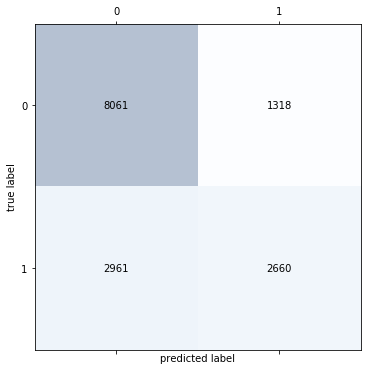

In [52]:
from sklearn.svm import SVC

# import data and split into features matrix and target vector
df = pd.read_csv(data, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# instantiate the learning algorithm
model = SVC(random_state=SEED)

# create a params dict
model.fit(X_train, y_train)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(accuracy))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

## Decision Tree

Best max_depth: 10
Best min_samples_leaf: 0.01
Tuned Decision Tree Accuracy:	0.758
              precision    recall  f1-score   support

       False       0.81      0.81      0.81      9379
        True       0.68      0.67      0.68      5621

   micro avg       0.76      0.76      0.76     15000
   macro avg       0.74      0.74      0.74     15000
weighted avg       0.76      0.76      0.76     15000



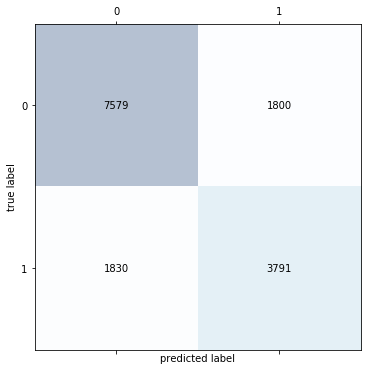

In [55]:
# imports
from sklearn.tree import DecisionTreeClassifier


# import data and split into features matrix and target vector
df = pd.read_csv(data, index_col = 0)

X, y = df[df.columns.tolist()[:-1]], df[df.columns.tolist()[-1]]

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = SEED)

# instantiate the learning algorithm
model = DecisionTreeClassifier()

# create a params dict
depth = [2, 3, 4, 5, 6, 10, 15, 20]
min_samples = [.01, .025, .05, .075, .1, .2]
hyperparameters = dict(max_depth = depth, min_samples_leaf = min_samples)

# instantiate grid search
gridsearch = GridSearchCV(model, hyperparameters, cv = 5, verbose = 0)

# fit grid search
best_model = gridsearch.fit(X_train, y_train)

# print the best hyperparameters
best_depth = best_model.best_estimator_.get_params()['max_depth']
best_min_samples = best_model.best_estimator_.get_params()['min_samples_leaf']
print('Best max_depth: {}'.format(best_depth))
print('Best min_samples_leaf: {}'.format(best_min_samples))


# RUN MODEL WITH BEST HYPERPARAMETERS

# instantiate a DecisionTreeClassifier
tuned_model = DecisionTreeClassifier(max_depth = best_depth,
                                     min_samples_leaf = best_min_samples,
                                     random_state = SEED)

# train the model
tuned_model.fit(X_train, y_train)

# make predictions
y_pred = tuned_model.predict(X_test)

# score accuracy
tuned_model_accuracy = accuracy_score(y_test, y_pred)
print('Tuned Decision Tree Accuracy:\t{}'.format(tuned_model_accuracy))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label');

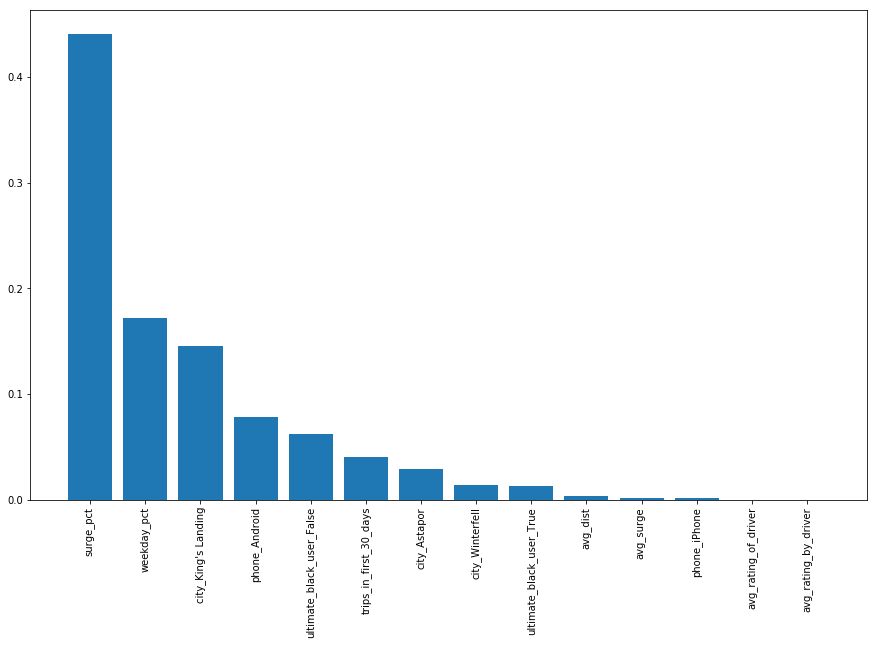

In [56]:
# calculate feature importances
importances = tuned_model.feature_importances_

# sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

plt.figure(figsize = (15, 9))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation = 90);